# Data Cleaning and Wrangiling with Pandas

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
sns.set_style('whitegrid')

In [14]:
# Loading the dataset
df = pd.read_csv('transactions.csv')
df.head(5)

,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
0,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74
2,CUST00001,David Schwartz,Kelantan,Q3-2025,14.0,14654.86
3,CUST00001,NaN,Kelantan,Q4-2025,23.0,991.57
4,CUST00002,Michelle Perez,Negeri Sembilan,Q1-2025,11.0,1558.18


In [15]:
# More details about the dataset

print(f"Dataset shape: {df.shape}")
print(f"\nDataset columns: {df.columns.tolist()}")
print(f"\nDataset type: {df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"Memeory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (1204, 6)

Dataset columns: ['customer_id', 'name', 'region', 'quarter', 'number_of_purchases', 'total_transaction_amount']

Dataset type: customer_id                     str
name                            str
region                          str
quarter                         str
number_of_purchases         float64
total_transaction_amount    float64
dtype: object

Missing values:
customer_id                  1
name                        61
region                      61
quarter                      1
number_of_purchases         62
total_transaction_amount    61
dtype: int64
Memeory usage: 0.28 MB


In [16]:
# Get Statistical summary of the dataset
df.describe()

,number_of_purchases,total_transaction_amount
count,1142.00,1143.00
mean,13.05,7495.47
std,7.52,4284.16
min,0.00,2.14
25%,7.00,3824.08
50%,13.00,7406.97
75%,20.00,11221.43
max,25.00,14984.03


In [17]:
# Get more info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1203 non-null   str    
 1   name                      1143 non-null   str    
 2   region                    1143 non-null   str    
 3   quarter                   1203 non-null   str    
 4   number_of_purchases       1142 non-null   float64
 5   total_transaction_amount  1143 non-null   float64
dtypes: float64(2), str(4)
memory usage: 56.6 KB


## 2. Data quality assesment

### 2.1 Checking for missing values

In [18]:
# Check mising values
df_dirty = df.copy()

# Check missing values
print(f"Missing values:\n{df_dirty.isnull().sum()}")
print(f"\nMissing values percentage:\n{df_dirty.isnull().sum()/len(df_dirty) * 100}%")

Missing values:
customer_id                  1
name                        61
region                      61
quarter                      1
number_of_purchases         62
total_transaction_amount    61
dtype: int64

Missing values percentage:
customer_id                 0.08
name                        5.07
region                      5.07
quarter                     0.08
number_of_purchases         5.15
total_transaction_amount    5.07
dtype: float64%


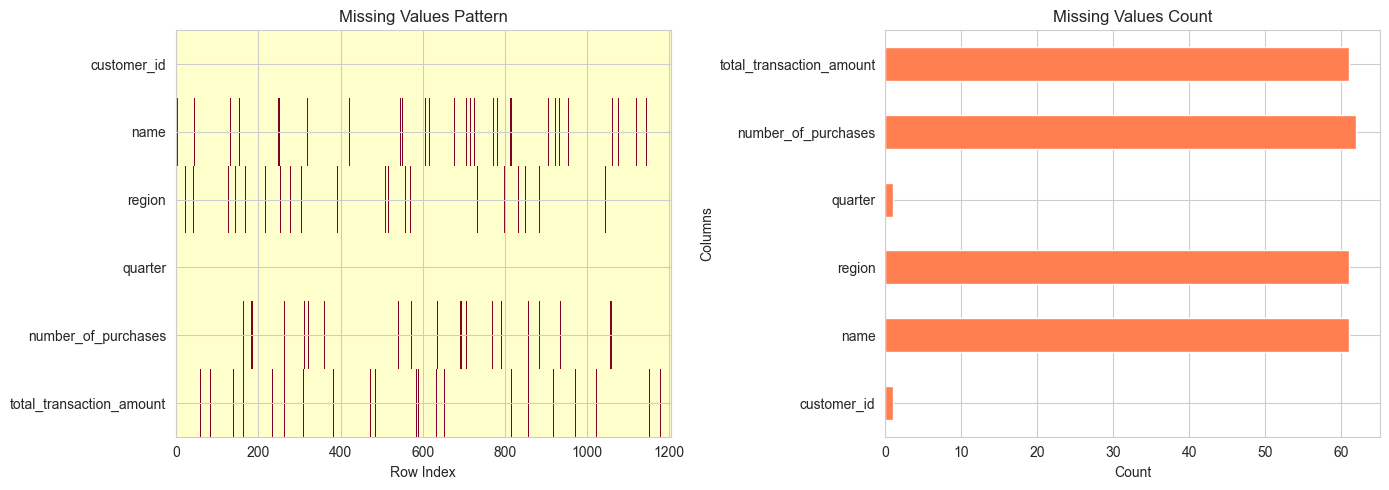

In [19]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Heatmap of missing values
missing_matrix = df_dirty.isnull().astype(int)
axes[0].imshow(missing_matrix.T, aspect='auto', cmap='YlOrRd', interpolation='nearest')
axes[0].set_title('Missing Values Pattern')
axes[0].set_xlabel('Row Index')
axes[0].set_yticks(range(len(df_dirty.columns)))
axes[0].set_yticklabels(df_dirty.columns)

# Bar plot of missing values count
missing_counts = df_dirty.isnull().sum()
missing_counts[missing_counts > 0].plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('Missing Values Count')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Columns')

plt.tight_layout()
plt.show()

## 3. Handling Missing Data

### 3.1 Dropping Missing Data

In [20]:
# Drop rows with any missing values
df_dropped_any = df_dirty.dropna()
print(f"Shape before dropping rows with missing values: {df_dirty.shape}")
print(f"Shape after dropping rows with missing values: {df_dropped_any.shape}")

Shape before dropping rows with missing values: (1204, 6)
Shape after dropping rows with missing values: (977, 6)


In [21]:
# Drop rows with all values missing 
df_dropped_all = df_dirty.dropna(how='all')
print(f"Shape before dropping rows with all missing values: {df_dirty.shape}")
print(f"Shape after dropping rows with all missing values: {df_dropped_all.shape}")

Shape before dropping rows with all missing values: (1204, 6)
Shape after dropping rows with all missing values: (1203, 6)


In [23]:
# Drop rows with missing in specific columns
df_dropped_specific = df_dirty.dropna(subset=['number_of_purchases', 'total_transaction_amount'])
print(f"Shape before dropping rows with missing number of purchases & total transaction amount in specific columns: {df_dirty.shape}")
print(f"Shape after dropping rows with missing number of purchases & total transaction amount in specific columns: {df_dropped_specific.shape}")

Shape before dropping rows with missing number of purchases & total transaction amount in specific columns: (1204, 6)
Shape after dropping rows with missing number of purchases & total transaction amount in specific columns: (1088, 6)


In [24]:
# Drop columns with any missing values
df_dropped_columns_any = df_dirty.dropna(axis=1)
print(f"Shape before dropping columns with any missing values: {df_dirty.shape}")
print(f"Shape after dropping columns with any missing values: {df_dropped_columns_any.shape}")

Shape before dropping columns with any missing values: (1204, 6)
Shape after dropping columns with any missing values: (1204, 0)


### 3.2 Filling Missing Data

In [26]:
# Fill numeric columns with a constant value (e.g., 0)
df_filled_zero = df_dirty.fillna({'number_of_purchases': 0, 'total_transaction_amount': 0})
print(f"Filled numeric columns with 0 - Missing Count:\n{df_filled_zero.isnull().sum().sum()}")

Filled numeric columns with 0 - Missing Count:
124


In [27]:
# Fill missing values with mean (for numeric columns)
numeric_cols = df_dirty.select_dtypes(include=[np.number]).columns
df_filled_mean = df_dirty.copy()
df_filled_mean[numeric_cols] = df_filled_mean[numeric_cols].fillna(df_filled_mean[numeric_cols].mean())
print(f"Filled numeric columns with mean - Missing Count:\n{df_filled_mean.isnull().sum().sum()}")

Filled numeric columns with mean - Missing Count:
124


In [28]:
df_dirty.head(20)

,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
0,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74
2,CUST00001,David Schwartz,Kelantan,Q3-2025,14.0,14654.86
3,CUST00001,NaN,Kelantan,Q4-2025,23.0,991.57
4,CUST00002,Michelle Perez,Negeri Sembilan,Q1-2025,11.0,1558.18
5,CUST00002,Michelle Perez,NaN,Q2-2025,4.0,2487.52
6,CUST00002,Michelle Perez,Negeri Sembilan,Q3-2025,2.0,11744.60
7,CUST00002,Michelle Perez,Negeri Sembilan,Q4-2025,7.0,12227.55
8,CUST00003,James Joseph,Kedah,Q1-2025,19.0,10805.19
9,CUST00003,James Joseph,Kedah,Q2-2025,19.0,7092.95


In [29]:
df_filled_mean.head(20)

,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
0,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74
2,CUST00001,David Schwartz,Kelantan,Q3-2025,14.0,14654.86
3,CUST00001,NaN,Kelantan,Q4-2025,23.0,991.57
4,CUST00002,Michelle Perez,Negeri Sembilan,Q1-2025,11.0,1558.18
5,CUST00002,Michelle Perez,NaN,Q2-2025,4.0,2487.52
6,CUST00002,Michelle Perez,Negeri Sembilan,Q3-2025,2.0,11744.60
7,CUST00002,Michelle Perez,Negeri Sembilan,Q4-2025,7.0,12227.55
8,CUST00003,James Joseph,Kedah,Q1-2025,19.0,10805.19
9,CUST00003,James Joseph,Kedah,Q2-2025,19.0,7092.95


In [30]:
# Fill with median
df_filled_median = df_dirty.copy()
df_filled_median[numeric_cols] = df_filled_median[numeric_cols].fillna(df_filled_median[numeric_cols].median())
print(f"Filled numeric columns with median - Missing Count:\n{df_filled_median.isnull().sum().sum()}")

Filled numeric columns with median - Missing Count:
124


In [31]:
# Fill differnt columns with different strategies
df_custom_filled = df_dirty.copy()
df_custom_filled['number_of_purchases'] = df_custom_filled['number_of_purchases'].fillna(df_custom_filled['number_of_purchases'].mean())
df_custom_filled['total_transaction_amount'] = df_custom_filled['total_transaction_amount'].fillna(df_custom_filled['total_transaction_amount'].median())
df_custom_filled['region'] = df_custom_filled['region'].fillna('Unknown')
print(f"Custom filled - Missing Count:\n{df_custom_filled.isnull().sum().sum()}")

Custom filled - Missing Count:
63


In [32]:
df_custom_filled.head(20)

,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
0,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74
2,CUST00001,David Schwartz,Kelantan,Q3-2025,14.0,14654.86
3,CUST00001,NaN,Kelantan,Q4-2025,23.0,991.57
4,CUST00002,Michelle Perez,Negeri Sembilan,Q1-2025,11.0,1558.18
5,CUST00002,Michelle Perez,Unknown,Q2-2025,4.0,2487.52
6,CUST00002,Michelle Perez,Negeri Sembilan,Q3-2025,2.0,11744.60
7,CUST00002,Michelle Perez,Negeri Sembilan,Q4-2025,7.0,12227.55
8,CUST00003,James Joseph,Kedah,Q1-2025,19.0,10805.19
9,CUST00003,James Joseph,Kedah,Q2-2025,19.0,7092.95


## 3.3 Foward Fill and Backward Fill

In [33]:
# Forward fill (Propogate last valid observation forward)
df_ffill = df_dirty.ffill()
print(f"Forward fill - Missing Count:\n{df_ffill.isnull().sum().sum()}")
df_ffill.head(20)

Forward fill - Missing Count:
0


,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
0,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74
2,CUST00001,David Schwartz,Kelantan,Q3-2025,14.0,14654.86
3,CUST00001,David Schwartz,Kelantan,Q4-2025,23.0,991.57
4,CUST00002,Michelle Perez,Negeri Sembilan,Q1-2025,11.0,1558.18
5,CUST00002,Michelle Perez,Negeri Sembilan,Q2-2025,4.0,2487.52
6,CUST00002,Michelle Perez,Negeri Sembilan,Q3-2025,2.0,11744.60
7,CUST00002,Michelle Perez,Negeri Sembilan,Q4-2025,7.0,12227.55
8,CUST00003,James Joseph,Kedah,Q1-2025,19.0,10805.19
9,CUST00003,James Joseph,Kedah,Q2-2025,19.0,7092.95


In [34]:
# Backward fill (Propogate next valid observation backward)
df_bfill = df_dirty.bfill()
print(f"Backward fill - Missing Count:\n{df_bfill.isnull().sum().sum()}")
df_bfill.head(20)

Backward fill - Missing Count:
1


,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
0,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74
2,CUST00001,David Schwartz,Kelantan,Q3-2025,14.0,14654.86
3,CUST00001,Michelle Perez,Kelantan,Q4-2025,23.0,991.57
4,CUST00002,Michelle Perez,Negeri Sembilan,Q1-2025,11.0,1558.18
5,CUST00002,Michelle Perez,Negeri Sembilan,Q2-2025,4.0,2487.52
6,CUST00002,Michelle Perez,Negeri Sembilan,Q3-2025,2.0,11744.60
7,CUST00002,Michelle Perez,Negeri Sembilan,Q4-2025,7.0,12227.55
8,CUST00003,James Joseph,Kedah,Q1-2025,19.0,10805.19
9,CUST00003,James Joseph,Kedah,Q2-2025,19.0,7092.95


In [38]:
# Combine forward and backward fill
df_combined_fill = df_dirty.copy()
df_combined_fill = df_combined_fill.ffill().bfill()
print(f"Combined forward and backward fill - Missing Count:\n{df_combined_fill.isnull().sum().sum()}")
df_combined_fill.head(20)

Combined forward and backward fill - Missing Count:
0


,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
0,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74
2,CUST00001,David Schwartz,Kelantan,Q3-2025,14.0,14654.86
3,CUST00001,David Schwartz,Kelantan,Q4-2025,23.0,991.57
4,CUST00002,Michelle Perez,Negeri Sembilan,Q1-2025,11.0,1558.18
5,CUST00002,Michelle Perez,Negeri Sembilan,Q2-2025,4.0,2487.52
6,CUST00002,Michelle Perez,Negeri Sembilan,Q3-2025,2.0,11744.60
7,CUST00002,Michelle Perez,Negeri Sembilan,Q4-2025,7.0,12227.55
8,CUST00003,James Joseph,Kedah,Q1-2025,19.0,10805.19
9,CUST00003,James Joseph,Kedah,Q2-2025,19.0,7092.95


In [39]:
df_dirty.head(20)

,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
0,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74
2,CUST00001,David Schwartz,Kelantan,Q3-2025,14.0,14654.86
3,CUST00001,NaN,Kelantan,Q4-2025,23.0,991.57
4,CUST00002,Michelle Perez,Negeri Sembilan,Q1-2025,11.0,1558.18
5,CUST00002,Michelle Perez,NaN,Q2-2025,4.0,2487.52
6,CUST00002,Michelle Perez,Negeri Sembilan,Q3-2025,2.0,11744.60
7,CUST00002,Michelle Perez,Negeri Sembilan,Q4-2025,7.0,12227.55
8,CUST00003,James Joseph,Kedah,Q1-2025,19.0,10805.19
9,CUST00003,James Joseph,Kedah,Q2-2025,19.0,7092.95


### 3.4 Interpolation

For numeric columns interpolation estimates missing values from neighbouring values

In [41]:
# Linear interpolation for numeric columns
df_interpolated = df_dirty.copy()
df_interpolated[numeric_cols] = df_interpolated[numeric_cols].interpolate(method='linear')
print(f"Linear interpolation - Missing Count:\n{df_interpolated.isnull().sum().sum()}")

# Show example: total_transaction_amount before and after interpolation
sample_col = 'total_transaction_amount'
missing_idx = df_dirty[sample_col].isnull()
if missing_idx.sum() > 0:
   sample_idx = df_dirty[sample_col].isnull().idxmax()  # Get index of first missing value
   window = slice(max(0, sample_idx - 3), min(len(df_dirty), sample_idx + 3))  # Get a window around the missing value
   comparison =  pd.DataFrame({
       'Original': df_dirty.loc[window, sample_col],
       'Interpolated': df_interpolated.loc[window, sample_col]
   })
   print(f"\nInterpolation example for {sample_col}:")
   print(comparison)


Linear interpolation - Missing Count:
124

Interpolation example for total_transaction_amount:
    Original  Interpolated
9    7092.95       7092.95
10    243.42        243.42
11    826.61        826.61
12       NaN       3262.79
13   5698.96       5698.96
14  14410.61      14410.61
15   1852.30       1852.30


## 4. Handling Duplication


### 4.1 Detecting Duplicates

In [44]:
#  Add some duplicates rows for demonstration
df_with_duplicates = df.copy()
df_with_duplicates = pd.concat([df_with_duplicates, df.head(10), df.iloc[50:55]], ignore_index=True)

print(f"Shape before adding duplicates: {df.shape}")
print(f"Shape after adding duplicates: {df_with_duplicates.shape}")

# Check for duplicates
duplicates = df_with_duplicates.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Show duplicate rows
duplicate_rows = df_with_duplicates[duplicates]
print(f"\nDuplicate rows:\n{duplicate_rows}")

Shape before adding duplicates: (1204, 6)
Shape after adding duplicates: (1219, 6)
Number of duplicate rows: 15

Duplicate rows:
     customer_id            name           region  quarter  \
1204   CUST00001  David Schwartz         Kelantan  Q1-2025   
1205   CUST00001  David Schwartz         Kelantan  Q2-2025   
1206   CUST00001  David Schwartz         Kelantan  Q3-2025   
1207   CUST00001             NaN         Kelantan  Q4-2025   
1208   CUST00002  Michelle Perez  Negeri Sembilan  Q1-2025   
1209   CUST00002  Michelle Perez              NaN  Q2-2025   
1210   CUST00002  Michelle Perez  Negeri Sembilan  Q3-2025   
1211   CUST00002  Michelle Perez  Negeri Sembilan  Q4-2025   
1212   CUST00003    James Joseph            Kedah  Q1-2025   
1213   CUST00003    James Joseph            Kedah  Q2-2025   
1214   CUST00013     Linda Lynch            Sabah  Q3-2025   
1215   CUST00013     Linda Lynch            Sabah  Q4-2025   
1216   CUST00014   James Allison           Penang  Q1-2025   
121

In [46]:
# Check duplicates based on specific columns (e.g., customer_id and quarter)

duplicate_on_key = df_with_duplicates.duplicated(subset=['customer_id', 'quarter'])
print(f"Number of duplicate rows based on customer_id and quarter: {duplicate_on_key.sum()}")

# Show duplicate rows 
print(f"\nDuplicate rows based on customer_id and quarter:\n")
df_with_duplicates[duplicate_on_key].head()

Number of duplicate rows based on customer_id and quarter: 18

Duplicate rows based on customer_id and quarter:



,customer_id,name,region,quarter,number_of_purchases,total_transaction_amount
1200,CUST00300,KY,KL,Q1-2025,22.0,7627.14
1202,CUST00300,KY,KL,Q3-2025,4.0,12473.29
1203,CUST00300,KY,KL,Q4-2025,NaN,5809.52
1204,CUST00001,David Schwartz,Kelantan,Q1-2025,24.0,14762.51
1205,CUST00001,David Schwartz,Kelantan,Q2-2025,21.0,5744.74


In [47]:
# keep the first occurrence of duplicates
df_no_duplicates = df_with_duplicates.drop_duplicates(subset=['customer_id', 'quarter'], keep='first')
print(f"Shape after dropping duplicates based on customer_id and quarter: {df_no_duplicates.shape}")

Shape after dropping duplicates based on customer_id and quarter: (1201, 6)


## 5. Data Validation and Quality Checks


### 5.1 Value Range Validation

In [49]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Check for negative values in numeric columns
print("Checking for negative values in numeric columns:\n")
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"{col}: {negative_count} negative values")
    else:
        print(f"{col}: No negative values")

# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nOutliers detected for total_transaction_amount:\n")
outliers , lower, upper = find_outliers_iqr(df.dropna(subset=['total_transaction_amount']), 'total_transaction_amount')
print(f"IQR Range: [{lower:.2f}, {upper:.2f}]")
print(f"Outlier found: {len(outliers)}")
if len(outliers) > 0:
    print(outliers[['customer_id','region', 'quarter', 'total_transaction_amount']]).head()


Checking for negative values in numeric columns:

number_of_purchases: No negative values
total_transaction_amount: No negative values

Outliers detected for total_transaction_amount:

IQR Range: [-7271.95, 22317.46]
Outlier found: 0
